In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn')

In [2]:
routes_cols = {
    'route_long_name': str,
    'route_short_name': str,
    'agency_id': np.int64,
    'route_type': np.int64,
    'route_id': np.int64
}
routes = pd.read_csv('original/routes.txt', dtype=routes_cols)

In [3]:
trips_cols = {
    'route_id': np.int64,
    'service_id': np.int64,
    'direction_id': np.int64,
    'trip_id': np.int64
}
trips = pd.read_csv('original/trips.txt', dtype=trips_cols)

In [4]:
agency_cols = {
    'agency_id': np.int64,
    'agency_name': str,
    'agency_url': str,
    'agency_timezone': str,
    'agency_lang': str
}
agency = pd.read_csv('original/agency.txt', dtype=agency_cols)

In [5]:
stops_cols = {
    'stop_name': str,
    'stop_id': np.int64,
    'stop_lat': np.float64,
    'stop_lon': np.float64
}
stops = pd.read_csv('original/stops.txt', dtype=stops_cols)

In [6]:
stop_times_cols = {
    'trip_id': np.int64,
    'arrival_time': str,
    'departure_time': str,
    'stop_id': np.int64,
    'stop_sequence': np.int64,
    'pickup_type': np.float64,
    'drop_off_type': np.float64
}
stop_times = pd.read_csv('original/stop_times.txt', dtype=stop_times_cols)

In [7]:
agency[agency['agency_id'] == 73]

,agency_id,agency_name,agency_url,agency_timezone,agency_lang
86,73,DB Regio AG Bayern,https://www.bahn.de,Europe/Berlin,de


In [8]:
routes_sbahn = routes[
    (routes['agency_id'] == 73) &
    (routes['route_long_name'].str.startswith('S')) &
    ~(routes['route_long_name'].str.fullmatch('S60'))
]
del routes
routes_sbahn

,route_long_name,route_short_name,agency_id,route_type,route_id
773,S1,S1,73,2,134
794,S2,S2,73,2,94
797,S20,S20,73,2,773
811,S3,S3,73,2,135
825,S4,S4,73,2,132
845,S5,S5,73,2,553
858,S6,S6,73,2,34
871,S7,S7,73,2,105
880,S8,S8,73,2,11


In [9]:
trips_sbahn = pd.merge(routes_sbahn, trips, on='route_id', how='inner')
del trips
trips_sbahn = trips_sbahn[trips_cols.keys()]
trips_sbahn

,route_id,service_id,direction_id,trip_id
0,134,100,0,10678
1,134,100,0,11996
2,134,100,0,12411
3,134,100,0,12826
4,134,100,0,13608
...,...,...,...,...
4352,11,98,0,35196
4353,11,98,0,35862
4354,11,98,0,42906
4355,11,98,0,67467


In [10]:
stop_times_sbahn = pd.merge(trips_sbahn, stop_times, on='trip_id', how='inner')
del stop_times
stop_times_sbahn = stop_times_sbahn[stop_times_cols.keys()]
stop_times_sbahn

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type
0,10678,16:51:00,16:51:00,972,0,NaN,NaN
1,10678,16:52:00,16:53:00,13903,1,NaN,NaN
2,10678,16:59:00,17:04:00,9080,2,NaN,NaN
3,10678,17:07:00,17:07:00,1576,3,NaN,NaN
4,10678,17:10:00,17:10:00,3263,4,NaN,NaN
...,...,...,...,...,...,...,...
79238,70929,22:16:00,22:17:00,13692,18,NaN,NaN
79239,70929,22:18:00,22:19:00,13337,19,NaN,NaN
79240,70929,22:20:00,22:20:00,5508,20,NaN,NaN
79241,70929,22:22:00,22:22:00,8257,21,NaN,NaN


In [11]:
stops_sbahn = pd.merge(stop_times_sbahn, stops, on='stop_id', how='inner')
del stops
stops_sbahn = stops_sbahn[stops_cols.keys()].drop_duplicates()
stops_sbahn

,stop_name,stop_id,stop_lat,stop_lon
0,München Flughafen Terminal,972,48.353840,11.786310
331,München Flughafen Besucherpark,13903,48.352177,11.764157
662,Neufahrn(b Freising),9080,48.321840,11.661408
845,Eching,1576,48.302876,11.616555
1170,Lohhof,3263,48.288300,11.581206
...,...,...,...,...
79130,Herrsching,7152,47.998577,11.170479
79138,Unterföhring,10002,48.190310,11.646772
79205,Weßling(Oberbay),2374,48.077374,11.251768
79206,München-Daglfing,2563,48.149624,11.649330


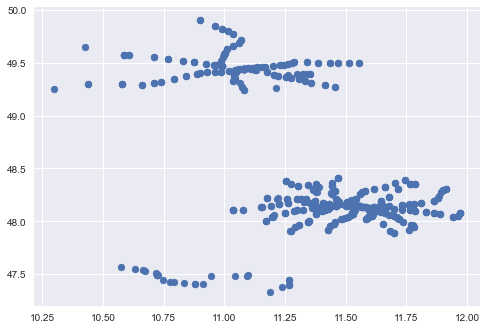

In [12]:
plt.scatter(stops_sbahn['stop_lon'], stops_sbahn['stop_lat'])

## Remove trips/routes outside of Munich

The dataset contains routes in Nurnbern and Austria, which we want to filter out

In [13]:
stops_sbahn = stops_sbahn[(stops_sbahn['stop_lat'] > 47.8) & (stops_sbahn['stop_lat'] < 49)]

Now to propagate throughout the other dataframes...  
We only wish to keep trips that are exclusively in Munich

In [ ]:
# df = stop_times_sbahn.merge(stops_sbahn, on='stop_id', how='inner') \
#     .merge(trips_sbahn, on='trip_id', how='inner')
# trips_to_keep = df[['trip_id']].drop_duplicates()

# trips_sbahn = pd.merge(trips_sbahn, trips_to_keep, on='trip_id', how='inner')

# del df
# del trips_to_keep

# Cluster stops

The dataset has multiple entries per station, which is prejudicial for the OMNeT++ configurations.

In [25]:
stops_sbahn[stops_sbahn['stop_name'].str.contains('Laim')]
# stops_sbahn[:]['stop_name'].unique()

,stop_name,stop_id,stop_lat,stop_lon
2902,Laim,9374,48.143414,11.502424
11876,München-Laim,5911,48.144370,11.503669
19858,Laim,4360,48.143410,11.502101
32192,München-Berg am Laim,10048,48.134056,11.633165
36827,München-Berg am Laim,8500,48.133960,11.633138
41587,München-Berg am Laim,13539,48.134003,11.633295
50726,München-Laim,7762,48.144287,11.503448


In [26]:
CLUSTER_RANGE = 0.005

class Cluster:
    def __init__(self) -> None:
        self.name = None
        self.id = -1
        self.lon = 0
        self.lat = 0
        self.stop_ids = set()
    
    def belongs(self, row: pd.Series):
        return abs(self.lon - row['stop_lon']) <= CLUSTER_RANGE \
            and abs(self.lat - row['stop_lat']) <= CLUSTER_RANGE

    def add(self, index: int, row: pd.Series) -> None:
        n_members = len(self.stop_ids)

        self.lon = ((self.lon * n_members) + row['stop_lon']) / (n_members + 1)
        self.lat = ((self.lat * n_members) + row['stop_lat']) / (n_members + 1)

        name = row['stop_name'].removeprefix('München').strip(' -')
        if self.name == None:
            self.id = index
            self.name = name
        elif self.name != name:
            print(f'Conflicting stop names "{name}" [{index}]  and "{self.name}" [{self.id}]')

        self.stop_ids.add(index)
    
    def get_dict(self) -> dict:
        d = { self.id: self.id }
        for stop in self.stop_ids:
            d[stop] = self.id
        return d


In [27]:
st = stops_sbahn.set_index('stop_id')

# Manual overrides of messed up station names :)
st.loc[1123, 'stop_name'] = 'Ostbahnhof'
st.loc[6998, 'stop_name'] = 'Ostbahnhof'
st.loc[9201, 'stop_name'] = 'Ostbahnhof'
st.loc[3970, 'stop_name'] = 'Hbf'
st.loc[3237, 'stop_name'] = 'Hbf'
st.loc[7640, 'stop_name'] = 'Hbf'
st.loc[8808, 'stop_name'] = 'Hbf'
st.loc[9964, 'stop_name'] = 'Hbf'
st.loc[4086, 'stop_name'] = 'Buchenau'
st.loc[3212, 'stop_name'] = 'Buchenau'
st.loc[7237, 'stop_name'] = 'Schwabhausen'
st.loc[4278, 'stop_name'] = 'Malching'
st.loc[11336, 'stop_name'] = 'Altomünster'


clusters = []
for index, row in st.iterrows():

    cluster = None
    # Try to find match in existing cluster    
    for c in clusters:
        if (c.belongs(row)):
            if (cluster == None):
                cluster = c
            else:
                print(f'"{row["stop_name"]}" Could fit multiple clusters: "{c.name}" and "{cluster.name}"')
    
    # If no cluster found, create another
    if cluster == None:
        cluster = Cluster()
        clusters.append(cluster)
    
    cluster.add(index, row)

# Create map of old -> new keys
# Build new dataframe from clusters
stop_update_map = dict()
data = []
for c in clusters:
    stop_update_map.update(c.get_dict())
    data.append((c.id, c.name, c.lon, c.lat))
new_stops = pd.DataFrame(data=data, columns=['stop_id', 'stop_name', 'stop_lon', 'stop_lat'])

del st

print(f'Clustering resulted in {len(new_stops.index)} stops')

Clustering resulted in 150 stops


### Propagate the new clusters to the stop_times dataframe

In [28]:
for old, new in stop_update_map.items():
    if old != new:
        stop_times_sbahn.loc[stop_times_sbahn['stop_id'] == old, 'stop_id'] = new

In [29]:
del stop_update_map

# OLD STUFF

In [18]:
pd.merge(stop_times_sbahn, stops_sbahn[['stop_id']], on='stop_id', how='inner')

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type
0,10678,16:51:00,16:51:00,972,0,NaN,NaN
1,11996,04:33:00,04:33:00,972,0,NaN,NaN
2,12411,15:06:00,15:06:00,972,19,NaN,NaN
3,12826,19:31:00,19:31:00,972,0,NaN,NaN
4,13608,11:06:00,11:06:00,972,19,NaN,NaN
...,...,...,...,...,...,...,...
68265,1911,01:30:00,01:31:00,2563,2,NaN,NaN
68266,24737,01:55:00,01:57:00,2563,7,NaN,NaN
68267,47770,00:50:00,00:51:00,2563,2,NaN,NaN
68268,71091,02:10:00,02:11:00,2563,2,NaN,NaN


In [19]:
meme = stop_times_sbahn.merge(stops_sbahn, on='stop_id', how='inner').merge(trips_sbahn, on='trip_id', how='inner').merge(routes_sbahn, on='route_id', how='inner')
meme

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,stop_name,stop_lat,stop_lon,route_id,service_id,direction_id,route_long_name,route_short_name,agency_id,route_type
0,10678,16:51:00,16:51:00,972,0,NaN,NaN,München Flughafen Terminal,48.353840,11.786310,134,100,0,S1,S1,73,2
1,10678,16:52:00,16:53:00,13903,1,NaN,NaN,München Flughafen Besucherpark,48.352177,11.764157,134,100,0,S1,S1,73,2
2,10678,16:59:00,17:04:00,9080,2,NaN,NaN,Neufahrn(b Freising),48.321840,11.661408,134,100,0,S1,S1,73,2
3,10678,17:07:00,17:07:00,1576,3,NaN,NaN,Eching,48.302876,11.616555,134,100,0,S1,S1,73,2
4,10678,17:10:00,17:10:00,3263,4,NaN,NaN,Lohhof,48.288300,11.581206,134,100,0,S1,S1,73,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68265,49844,16:00:00,16:00:00,14456,10,NaN,NaN,Eichenau(Oberbay),48.179270,11.328492,773,98,0,S20,S20,73,2
68266,49844,16:04:00,16:04:00,7607,11,NaN,NaN,Fürstenfeldbruck,48.172268,11.263293,773,98,0,S20,S20,73,2
68267,49844,16:06:00,16:07:00,11730,12,NaN,NaN,Buchenau,48.161350,11.225447,773,98,0,S20,S20,73,2
68268,49844,16:09:00,16:10:00,10489,13,NaN,NaN,Schöngeising,48.146523,11.191167,773,98,0,S20,S20,73,2


In [20]:
# meme[meme['stop_name'].str.contains('Untermenzing')]['route_long_name'].unique()
meme['route_long_name'].unique()

array(['S1', 'S2', 'S3', 'S4', 'S6', 'S8', 'S7', 'S20'], dtype=object)

In [21]:
meme[meme['stop_name'].str.contains('Pasing')].value_counts(subset=['stop_lat'])

stop_lat 
48.149853    407
48.149480    272
48.149014    242
48.148930    239
48.148796    237
48.149124     16
48.149364      6
48.149246      3
dtype: int64

In [22]:
meme[meme['stop_name'].str.contains('Pasing')].sort_values(by='departure_time')

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type,stop_name,stop_lat,stop_lon,route_id,service_id,direction_id,route_long_name,route_short_name,agency_id,route_type
37572,67229,00:13:00,00:13:00,7036,0,NaN,NaN,München-Pasing,48.149853,11.461872,132,29,0,S4,S4,73,2
43282,25269,00:22:00,00:22:00,7036,1,NaN,NaN,München-Pasing,48.149853,11.461872,34,103,0,S6,S6,73,2
47640,50282,00:23:00,00:23:00,7036,0,NaN,NaN,München-Pasing,48.149853,11.461872,34,92,0,S6,S6,73,2
34439,61122,00:29:00,00:29:00,10155,0,NaN,NaN,Pasing,48.149480,11.459009,132,100,0,S4,S4,73,2
28940,26352,00:33:00,00:33:00,7036,0,NaN,NaN,München-Pasing,48.149853,11.461872,135,103,0,S3,S3,73,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55373,58481,24:15:00,24:17:00,7036,10,NaN,NaN,München-Pasing,48.149853,11.461872,11,129,0,S8,S8,73,2
41124,36150,24:21:00,24:23:00,2839,23,NaN,NaN,Pasing,48.149014,11.459862,34,129,0,S6,S6,73,2
29925,38382,24:27:00,24:29:00,10860,21,NaN,NaN,Pasing,48.148930,11.459575,135,139,0,S3,S3,73,2
52196,48909,24:35:00,24:35:00,2839,10,NaN,NaN,Pasing,48.149014,11.459862,11,129,0,S8,S8,73,2


In [23]:
stops_sbahn[stops_sbahn['stop_name'].str.contains('Laim')]
# stops_sbahn[:]['stop_name'].unique()

,stop_name,stop_id,stop_lat,stop_lon
2902,Laim,9374,48.143414,11.502424
11876,München-Laim,5911,48.144370,11.503669
19858,Laim,4360,48.143410,11.502101
32192,München-Berg am Laim,10048,48.134056,11.633165
36827,München-Berg am Laim,8500,48.133960,11.633138
41587,München-Berg am Laim,13539,48.134003,11.633295
50726,München-Laim,7762,48.144287,11.503448
